In [1]:
import math
import os
import time
import master_function as mf
import pandas as pd
import requests
import json
from datetime import datetime, timedelta
import pytz
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# timestamps = pd.to_datetime(crypto[:,0], unit='ms', utc=False)
# timestamps = pd.Series(timestamps).dt.tz_localize("UTC").dt.tz_convert("America/New_York")
# timestamps

In [3]:
url = "https://api.binance.com/api/v1/time"
response = requests.get(url)
server_time = json.loads(response.text).get('serverTime')
print(server_time)
time_format = '%Y-%m-%d %H:%M'
d = datetime.fromtimestamp(server_time/1000).strftime('%Y-%m-%d %H:%M')
print(d)

1713888482471
2024-04-23 18:08


In [5]:
date_format = ("%Y-%m-%d")
dt1 = datetime.strptime("2023-02-10", date_format)
dt3 = datetime.strptime("2023-02-11", date_format)
td = dt3 - dt1
td.total_seconds() / 3600

24.0

In [6]:
def get_binance_data(start_date, end_date, interval='1m', iteration_interval=4, asset="BTCUSDT"):
    """iteration interval is the number of hours of data to be fetched from binance"""
    def get_iterations(st, end, iteration_interval):
        if st > end:
            raise ValueError("Start date can't be bigger then the end date")
        time_diff = end - st
        diff_hours = time_diff.total_seconds() / 3600
        num_iterations = math.ceil(diff_hours / iteration_interval)
        return num_iterations
        
    date_format = "%Y-%m-%d"
    start_dt = datetime.strptime(start_date, date_format)
    end_dt = datetime.strptime(end_date, date_format)
    iterations_count = get_iterations(start_dt, end_dt, iteration_interval)
    interval_mins = timedelta(minutes=iteration_interval*60-1)
    one_minute = timedelta(minutes=1)
    start_date = start_dt
    end_date = start_date + interval_mins
    path = "../papertrading/datasets/" + asset + "_" + interval + "_" + start_dt.strftime("%Y_%m_%d") + "_" + end_dt.strftime("%Y_%m_%d") + ".csv"
    
    if os.path.exists(path):
        os.remove(path)
    for i in range(iterations_count):
        print(f"Start date: {start_date.strftime(time_format)}")
        print(f"End date: {end_date.strftime(time_format)}")
        new_data = mf.import_crypto(asset, int(start_date.timestamp())*1000, int(end_date.timestamp())*1000, interval=interval)
        print(new_data.shape)
        timestamps = new_data[:,0]
        timestamps = pd.to_datetime(timestamps, unit='ms',utc=True)
        # timestamps = pd.Series(timestamps).dt.tz_convert("America/New_York")
        df_crypto = pd.DataFrame(new_data[:,1:6], columns=['open','high','low','close','volume'])
        df_crypto.index = timestamps
        df_crypto.rename_axis("Datetime", inplace=True)
        if i == 0:
            df_crypto.to_csv(path, mode='a')
        else: df_crypto.to_csv(path, mode='a', header=False)
        start_date = end_date + one_minute
        end_date = start_date + interval_mins
        time.sleep(0.3)

In [ ]:
get_binance_data("2023-01-01", "2024-04-01", asset="ETHUSDT")

Start date: 2023-01-01 00:00
End date: 2023-01-01 03:59
https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=1m&limit=500&startTime=1672527600000&endTime=1672541940000
(240, 12)
(240, 6)
Start date: 2023-01-01 04:00
End date: 2023-01-01 07:59
https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=1m&limit=500&startTime=1672542000000&endTime=1672556340000
(240, 12)
(240, 6)
Start date: 2023-01-01 08:00
End date: 2023-01-01 11:59
https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=1m&limit=500&startTime=1672556400000&endTime=1672570740000
(240, 12)
(240, 6)
Start date: 2023-01-01 12:00
End date: 2023-01-01 15:59
https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=1m&limit=500&startTime=1672570800000&endTime=1672585140000
(240, 12)
(240, 6)
Start date: 2023-01-01 16:00
End date: 2023-01-01 19:59
https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=1m&limit=500&startTime=1672585200000&endTime=1672599540000
(240, 12)
(240, 6)
Start date: 2023-01-

In [ ]:
directory = "./../papertrading/datasets/"
for fi in os.listdir(directory):
    print(os.path.join(directory, fi))

In [19]:
path = "./../papertrading/datasets/BTCUSDT_1m_2024_03_01_2024_04_01.csv"

In [20]:
df_crypto = pd.read_csv(path)
df_crypto.index = df_crypto["Datetime"]
df_crypto.index = pd.to_datetime(df_crypto.index)
df_crypto.index

DatetimeIndex(['2024-02-29 23:00:00+00:00', '2024-02-29 23:01:00+00:00',
               '2024-02-29 23:02:00+00:00', '2024-02-29 23:03:00+00:00',
               '2024-02-29 23:04:00+00:00', '2024-02-29 23:05:00+00:00',
               '2024-02-29 23:06:00+00:00', '2024-02-29 23:07:00+00:00',
               '2024-02-29 23:08:00+00:00', '2024-02-29 23:09:00+00:00',
               ...
               '2024-03-31 21:50:00+00:00', '2024-03-31 21:51:00+00:00',
               '2024-03-31 21:52:00+00:00', '2024-03-31 21:53:00+00:00',
               '2024-03-31 21:54:00+00:00', '2024-03-31 21:55:00+00:00',
               '2024-03-31 21:56:00+00:00', '2024-03-31 21:57:00+00:00',
               '2024-03-31 21:58:00+00:00', '2024-03-31 21:59:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=44580, freq=None)

In [21]:
df_crypto = df_crypto.sort_index()

In [22]:
mf.validate_datetime_index(df_crypto)

(True, 'No gaps in the datetime index.')

In [52]:
len(df_crypto)

571540

In [53]:
df_crypto[:-1]['close']

Datetime
2023-02-28 23:00:00+00:00    23143.25
2023-02-28 23:01:00+00:00    23143.54
2023-02-28 23:02:00+00:00    23143.52
2023-02-28 23:03:00+00:00    23151.08
2023-02-28 23:04:00+00:00    23146.11
                               ...   
2024-03-31 21:54:00+00:00    70800.00
2024-03-31 21:55:00+00:00    70783.48
2024-03-31 21:56:00+00:00    70780.00
2024-03-31 21:57:00+00:00    70779.99
2024-03-31 21:58:00+00:00    70730.95
Name: close, Length: 571539, dtype: float64

In [54]:
time_diff = df_crypto.index.to_series().diff()
time_diff

Datetime
2023-02-28 23:00:00+00:00               NaT
2023-02-28 23:01:00+00:00   0 days 00:01:00
2023-02-28 23:02:00+00:00   0 days 00:01:00
2023-02-28 23:03:00+00:00   0 days 00:01:00
2023-02-28 23:04:00+00:00   0 days 00:01:00
                                  ...      
2024-03-31 21:55:00+00:00   0 days 00:01:00
2024-03-31 21:56:00+00:00   0 days 00:01:00
2024-03-31 21:57:00+00:00   0 days 00:01:00
2024-03-31 21:58:00+00:00   0 days 00:01:00
2024-03-31 21:59:00+00:00   0 days 00:01:00
Name: Datetime, Length: 571540, dtype: timedelta64[ns]

In [55]:
result = time_diff == pd.Timedelta(1, unit='minute')

In [56]:
result.shape

(571540,)

In [58]:
result[~result]

Datetime
2023-02-28 23:00:00+00:00    False
2023-03-24 14:00:00+00:00    False
Name: Datetime, dtype: bool

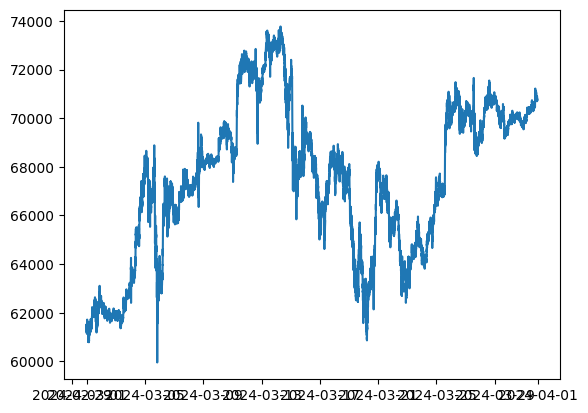

In [128]:
plt.plot(df_crypto.index, df_crypto['close'])

In [117]:
df_crypto['close'].mean()

70848.82058333332

In [119]:
df_crypto.describe()

,open,high,low,close,volume
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,70847.350500,70867.464000,70826.790708,70848.820583,16.676825
std,187.518037,191.174347,180.400895,186.216416,22.947839
min,70440.500000,70459.560000,70440.490000,70440.500000,1.113700
25%,70751.970000,70780.000000,70733.657500,70758.222500,6.558120
50%,70868.000000,70899.000000,70850.480000,70868.000000,10.739445
75%,70987.845000,71009.352500,70946.502500,70987.845000,18.423278
max,71222.000000,71227.220000,71160.880000,71221.990000,247.244620
